# 시간대별 전국 교통량

In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from google.oauth2 import service_account
from google.cloud import bigquery

In [10]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [11]:
plt.rc("font", family="Malgun Gothic")

In [12]:
traffic_time_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic`
"""

In [13]:
traffic_time_df = client.query(traffic_time_sql).to_dataframe()
traffic_time_df = traffic_time_df.set_index("time")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [14]:
traffic_time_df

,total
time,
0시~2시,5682623
2시~4시,2942277
4시~6시,5088582
6시~8시,23940644
8시~10시,28041388
10시~12시,28463597
12시~14시,27232563
14시~16시,29380657
16시~18시,31298060


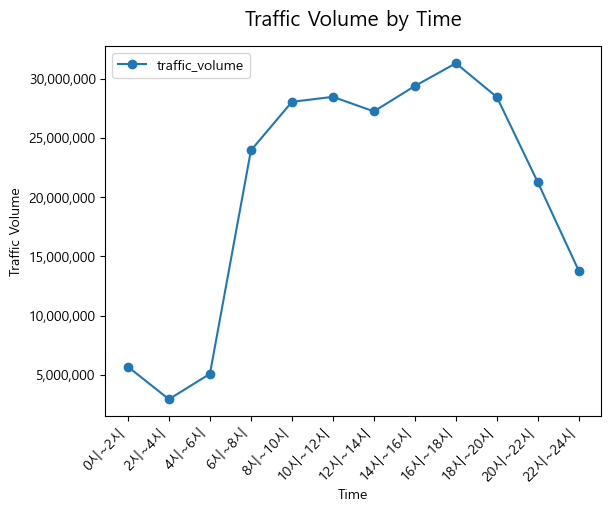

In [15]:
plt.title("Traffic Volume by Time", size=15, pad=15)
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.plot(traffic_time_df, marker="o", label="traffic_volume")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("traffic_time.png", bbox_inches="tight")